## Contents
This notebook shows how to use the functionality in the `HealpixTree` class. This is a useful function to find groups of Healpixels at high resolution which are connected and nearby. In particular this notebook illustrates two useful methods:
- __How to find the descendent pixels of a sequence of pixels at the next higher resolution__ using `pixelsAtNextLevel`
- __How to find the descendent pixels at a sequence of pixels at resolution res above the resolution__ using `pixelsAtResolutionLevel`

In [1]:
from mpl_toolkits.basemap import Basemap

In [2]:
import opsimsummary as oss

In [3]:
oss.__VERSION__

'0.8.3'

In [4]:
from opsimsummary import HealpixTree, pixelsForAng, HealpixTiles

In [5]:
import numpy as np

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
import healpy as hp

## Instantiate the object

In [8]:
htree = HealpixTree(nside=1, nest=True)

## Find all the healpixels at the resolution one level higher

In [9]:
# By default the nside argument to this function is the nside at which htree was instantiated
print(htree.nside)
ipix =  np.array([0, 1])
htree.pixelsAtNextLevel(ipix)

1


(2, array([0, 1, 2, 3, 4, 5, 6, 7]))

In [10]:
# We can also be specific, and do this for a particular NSIDE
htree.pixelsAtNextLevel(ipix, nside=128)

(256, array([0, 1, 2, 3, 4, 5, 6, 7]))

## Find all the pixels at NSIDE=256, which are owned by pixelid =1  at NSIDE=1

In [11]:
# How many subdivisions required to go to NSIDE =256 ?
desideredNSIDE = 256
res = int(np.log2(desideredNSIDE))

In [12]:
# nsidenew should be the NSIDE at the resolution we want
nsidenew, pixels = htree.pixelsAtResolutionLevel(1, res, 1)

In [13]:
assert nsidenew == desideredNSIDE

### Visusalize this

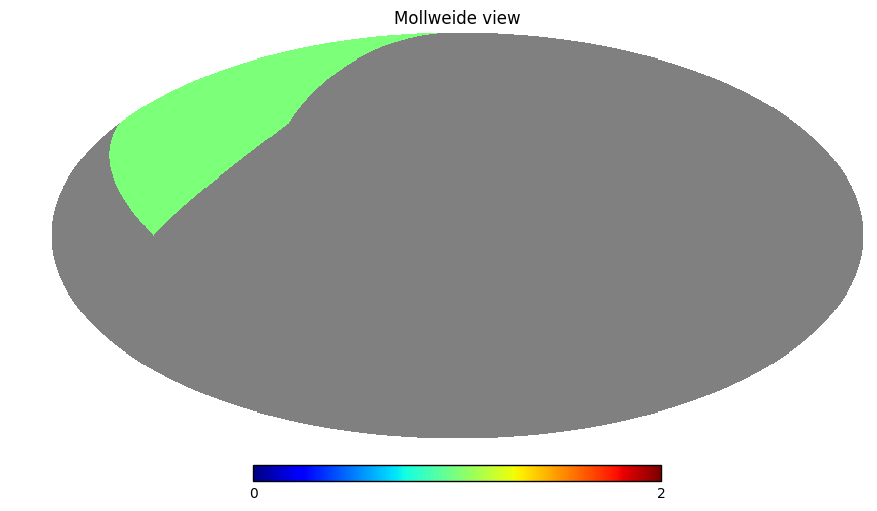

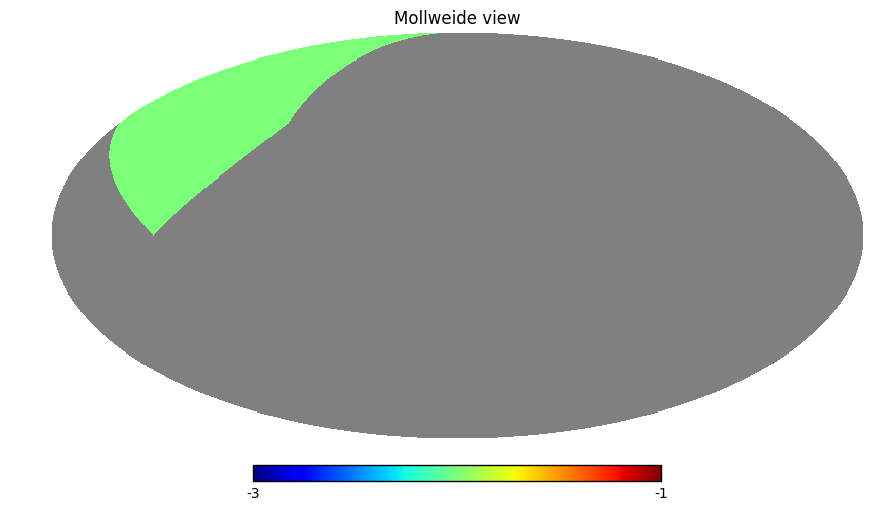

In [14]:
n256 = hp.nside2npix(256)
n1 = hp.nside2npix(1)
arr1 = np.ones(n1) * hp.UNSEEN
arr1[1] = 1
arr256 = np.ones(n256) * hp.UNSEEN
arr256[pixels] = -2
hp.mollview(arr1, nest=True)
hp.mollview(arr256, nest=True)